# Analysis

Train the various algorithms and show your results. 

You must plot the reward obtained by your agent per step and the total regret accumulated so far.

This one is an open ended assignment, so feel free to play around. Extra credit for more beautiful plots (you can check out Seaborn). 

d:\Software_2\Anaconda_Distribution\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Software_2\Anaconda_Distribution\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Software_2\Anaconda_Distribution\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Software_2\Anaconda_Distribution\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

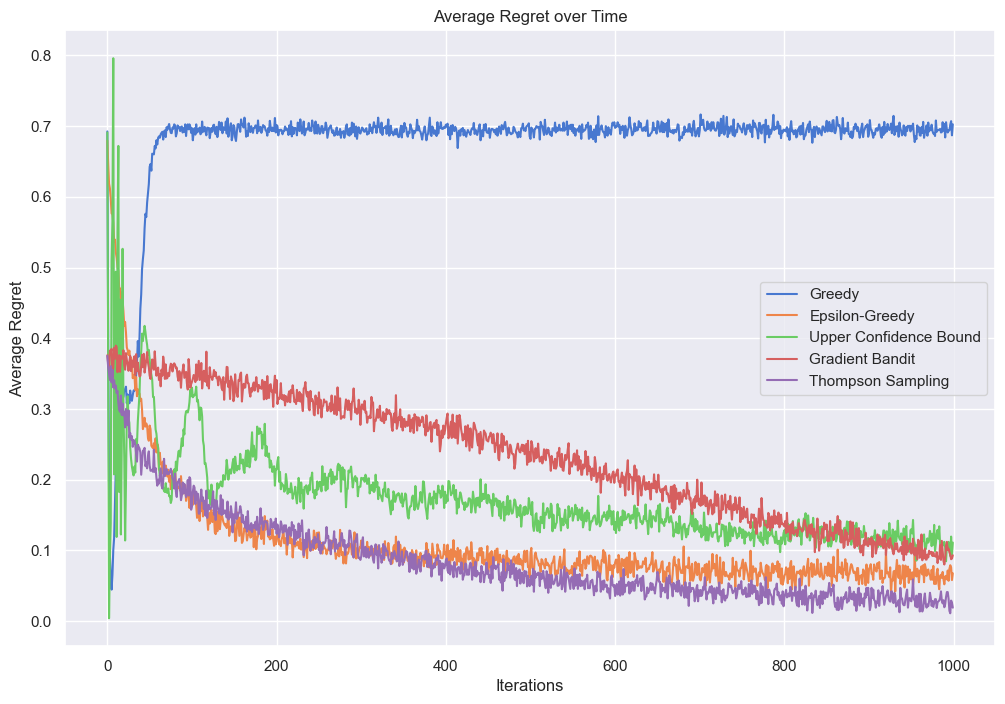

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bandits import Bandit
from agents import GreedyAgent, epsGreedyAgent, GradientBanditAgent, ThompsonSamplerAgent, UpperConfidenceBoundAgent

def simulate(agent_class, bandit, agent_params, iterations=1000, runs=2000):
    rewards = np.zeros(iterations)
    regrets = np.zeros(iterations)

    for _ in range(runs):
        agent = agent_class(bandit, **agent_params)
        for t in range(iterations):
            agent.act()
            rewards[t] += agent.rewards
            regrets[t] += bandit.get_regret()
            bandit.reset_regret()

    return rewards / runs, regrets / runs

def plot_results(agents, bandit, iterations=1000, runs=2000):
    sns.set(style="darkgrid", palette="muted", color_codes=True)
    plt.figure(figsize=(12, 8))
    
    for agent_class, agent_params, label in agents:
        rewards, regrets = simulate(agent_class, bandit, agent_params, iterations, runs)
        sns.lineplot(data=regrets, label=label)
    
    plt.xlabel('Iterations')
    plt.ylabel('Average Regret')
    plt.title('Average Regret over Time')
    plt.legend()
    plt.show()

bandit = Bandit(20, "Bernoulli")

agents = [
    (GreedyAgent, {"initialQ": 1}, "Greedy"),
    (epsGreedyAgent, {"epsilon": 0.1}, "Epsilon-Greedy"),
    (UpperConfidenceBoundAgent, {"c": 1}, "Upper Confidence Bound"),
    (GradientBanditAgent, {"alpha": 0.1}, "Gradient Bandit"),
    (ThompsonSamplerAgent, {}, "Thompson Sampling")
]

plot_results(agents, bandit)
